In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,cross_validate,KFold,cross_val_predict
from sklearn.cross_decomposition import PLSRegression
# 实用函数
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, roc_auc_score,make_scorer

import time
import spectrapepper as spep

from spectra_processing import *

In [2]:
FTIR_train=pd.read_csv('数据集/FTIR_rabbit_train_ave_mean center.csv',index_col=0)
FTIR_test=pd.read_csv('数据集/FTIR_rabbit_test_ave_mean center.csv',index_col=0)
FTIR_wavenum=np.array(FTIR_train.columns.tolist()[7:],dtype='float')
FTIR_datatrain=FTIR_train.iloc[:,7:]

Raman_train=pd.read_csv('数据集/Raman_rabbit_train_ave_mean center.csv',index_col=0)
Raman_test=pd.read_csv('数据集/Raman_rabbit_test_ave_mean center.csv',index_col=0)
Raman_wavenum=np.array(Raman_train.columns.tolist()[7:],dtype='float')
Raman_datatrain=Raman_train.iloc[:,7:]

Combine_train=pd.concat([FTIR_train,Raman_train.iloc[:,7:]],axis=1)
Combine_test=pd.concat([FTIR_test,Raman_test.iloc[:,7:]],axis=1)
Combine_wavenum=np.array(Combine_train.columns.tolist()[7:],dtype='float')
Combine_datatrain=Combine_train.iloc[:,7:]

In [3]:
data_FTIR_train=FTIR_train.copy()
data_FTIR_test=FTIR_test.copy()


data_FTIR_train['label1'].replace(to_replace='Q',value=1,inplace=True)
data_FTIR_train['label1'].replace(to_replace='S',value=0,inplace=True)
data_FTIR_train['label6'].replace(to_replace='Q',value=1,inplace=True)
data_FTIR_train['label6'].replace(to_replace='QS',value=2,inplace=True)
data_FTIR_train['label6'].replace(to_replace='S',value=0,inplace=True)

data_FTIR_test['label1'].replace(to_replace='Q',value=1,inplace=True)
data_FTIR_test['label1'].replace(to_replace='S',value=0,inplace=True)
data_FTIR_test['label6'].replace(to_replace='Q',value=1,inplace=True)
data_FTIR_test['label6'].replace(to_replace='QS',value=2,inplace=True)
data_FTIR_test['label6'].replace(to_replace='S',value=0,inplace=True)

data_Raman_train=Raman_train.copy()
data_Raman_test=Raman_test.copy()


data_Raman_train['label_1'].replace(to_replace='Q',value=1,inplace=True)
data_Raman_train['label_1'].replace(to_replace='S',value=0,inplace=True)
data_Raman_train['label_6'].replace(to_replace='Q',value=1,inplace=True)
data_Raman_train['label_6'].replace(to_replace='QS',value=2,inplace=True)
data_Raman_train['label_6'].replace(to_replace='S',value=0,inplace=True)

data_Raman_test['label_1'].replace(to_replace='Q',value=1,inplace=True)
data_Raman_test['label_1'].replace(to_replace='S',value=0,inplace=True)
data_Raman_test['label_6'].replace(to_replace='Q',value=1,inplace=True)
data_Raman_test['label_6'].replace(to_replace='QS',value=2,inplace=True)
data_Raman_test['label_6'].replace(to_replace='S',value=0,inplace=True)


data_Combine_train=Combine_train.copy()
data_Combine_test=Combine_test.copy()


data_Combine_train['label1'].replace(to_replace='Q',value=1,inplace=True)
data_Combine_train['label1'].replace(to_replace='S',value=0,inplace=True)
data_Combine_train['label6'].replace(to_replace='Q',value=1,inplace=True)
data_Combine_train['label6'].replace(to_replace='QS',value=2,inplace=True)
data_Combine_train['label6'].replace(to_replace='S',value=0,inplace=True)

data_Combine_test['label1'].replace(to_replace='Q',value=1,inplace=True)
data_Combine_test['label1'].replace(to_replace='S',value=0,inplace=True)
data_Combine_test['label6'].replace(to_replace='Q',value=1,inplace=True)
data_Combine_test['label6'].replace(to_replace='QS',value=2,inplace=True)
data_Combine_test['label6'].replace(to_replace='S',value=0,inplace=True)

In [4]:
x_FTIR_train=data_FTIR_train.iloc[:,7:].values
y_FTIR_train_two=data_FTIR_train['label1'].values
y_FTIR_train_three=data_FTIR_train['label6'].values
x_FTIR_test=data_FTIR_test.iloc[:,7:].values
y_FTIR_test_two=data_FTIR_test['label1'].values
y_FTIR_test_three=data_FTIR_test['label6'].values



x_Raman_train=data_Raman_train.iloc[:,7:].values
y_Raman_train_two=data_Raman_train['label_1'].values
y_Raman_train_three=data_Raman_train['label_6'].values
x_Raman_test=data_Raman_test.iloc[:,7:].values
y_Raman_test_two=data_Raman_test['label_1'].values
y_Raman_test_three=data_Raman_test['label_6'].values


x_Combine_train=data_Combine_train.iloc[:,7:].values
y_Combine_train_two=data_Combine_train['label1'].values
y_Combine_train_three=data_Combine_train['label6'].values
x_Combine_test=data_Combine_test.iloc[:,7:].values
y_Combine_test_two=data_Combine_test['label1'].values
y_Combine_test_three=data_Combine_test['label6'].values

label_1=Combine_test['label1']
label_6=Combine_test['label6']
label_2=Combine_test['label2']

label_two= list(set(label_1))
label_two.sort()
label_three=list(set(label_6))
label_three.sort()
label_post=list(set(label_2))
label_post.sort()

In [5]:
y_Raman_test_two==y_FTIR_test_two

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

# 重建评估器


In [6]:
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin

In [7]:
class PLS_DA(BaseEstimator, TransformerMixin,ClassifierMixin):
    
    def __init__(self, n_components=10,scale=True,max_iter=500,tol=1e-06,thred=0.5):
        self.n_components =n_components
        self.scale=scale
        self.max_iter = max_iter
        self.tol = tol
        self.thred = thred
        
    def fit(self, X, y):
        y_1=pd.get_dummies(y)
        clf = PLSRegression(n_components = self.n_components, 
                                 scale = self.scale, 
                                 max_iter = self.max_iter, 
                                 tol = self.tol)
        clf.fit(X, y_1)
        self.coef_ = clf.coef_
        self.clf=clf
        self.x_loadings_ = clf.x_loadings_
        self.y_loadings_ = clf.y_loadings_
        self.x_scores_ = clf.x_scores_
        self.y_scores_ = clf.y_scores_
        self.classes_=np.unique(y)
        return self
    
    def predict(self, X):
        res = (self.clf.predict(X)[:, 1]>=self.thred) * 1
        return res
    
    def predict_proba(self,X):
        pro=self.clf.predict(X)
        return pro
    
    def score(self,X,y):
        return accuracy_score(y, (self.clf.predict(X)[:, 1]>=self.thred) * 1)
    

# TPE搜索

In [8]:
## TPE搜索
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, partial
from hyperopt.early_stop import no_progress_loss


def hyperopt_objective(params):
    
    #定义评估器
    #需要搜索的参数需要从输入的字典中索引出来
    #不需要搜索的参数，可以是设置好的某个值
    #在需要整数的参数前调整参数类型
    clf=PLS_DA(n_components=int(params['n_components'])
           ,thred=params['thred']
           )
    
    cv=KFold(n_splits=10,shuffle=True,random_state=int(params['random_state']))
    result_bench = cross_validate(clf,x_FTIR_train,y_FTIR_train_two,cv=cv,scoring="accuracy"
                          ,return_train_score=True
                          ,verbose=0
                          ,n_jobs=48
                          ,error_score='raise')
 
    
    
    #最终输出结果，由于只能取最小值，所以必须对（-RMSE）求绝对值
    #以求解最小RMSE所对应的参数组合
    return -(np.mean(result_bench['test_score']))
 
    

param_grid_tpe = {'n_components':hp.quniform('n_components',1,40,1)
                     ,'thred': hp.uniform("thred",0,1)
                     ,'random_state':hp.quniform('random_state',1,1000,1)
                    }

def param_hyperopt(max_evals=100,n=50):
    
    #保存迭代过程
    trials = Trials()
    
    #设置提前停止
    early_stop_fn = no_progress_loss(n)
    
    #定义代理模型
    #algo = partial(tpe.suggest, n_startup_jobs=20, n_EI_candidates=50)
    params_best = fmin(hyperopt_objective #目标函数
                       , space = param_grid_tpe #参数空间
                       , algo = tpe.suggest #代理模型你要哪个呢？
                       #, algo = algo
                       , max_evals = max_evals #允许的迭代次数
                       , verbose=1
                       , trials = trials
                       , early_stop_fn = early_stop_fn
                      )
    
    #打印最优参数，fmin会自动打印最佳分数
    print("\n","\n","best params: ", params_best,
          "\n")
    return params_best, trials

 

In [9]:
# params_best, trials = param_hyperopt(1000,200)

In [10]:
#打包成函数供后续使用
#评估指标RMSE
def ACC(cvresult,key):
    return (cvresult[key].mean())

#计算参数空间大小
def count_space(param):
    no_option = 1
    for i in param:
        no_option *= len(param[i])
    print(no_option)
    
#在最优参数上进行重新建模验证结果
def rebuild_on_best_param(ad_reg,X,y):
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    result_post_adjusted = cross_validate(ad_reg,X,y,cv=cv,scoring="accuracy"
                                          ,return_train_score=True
                                          ,verbose=True
                                          ,n_jobs=-1)
    print("训练accuracy:{:.3f}".format(ACC(result_post_adjusted,"train_score")))
    print("测试accuracy:{:.3f}".format(ACC(result_post_adjusted,"test_score")))
    

def result_df(model, X_train, y_train, X_test, y_test, metrics=
              [accuracy_score, recall_score, precision_score, f1_score]):
    res_train = []
    res_test = []
    col_name = []
    for fun in metrics:
        res_train.append(fun(y_train,model.predict(X_train)))
        res_test.append(fun(y_test,model.predict(X_test))) 
        col_name.append(fun.__name__)
    idx_name = ['train_eval', 'test_eval']
    res = pd.DataFrame([res_train, res_test], columns=col_name, index=idx_name)
    return res

def result_multi(model, X_train, y_train, X_test, y_test, metrics=
              [accuracy_score, recall_score, precision_score, f1_score]):
    res_train = []
    res_test = []
    col_name = []
    
    res_train.append(accuracy_score(model.predict(X_train), y_train))
    res_test.append(accuracy_score(model.predict(X_test), y_test))
    col_name.append('accuracy_score')
    
    for fun in metrics[1:4]:
        res_train.append(fun(y_train,model.predict(X_train), average='macro'))
        res_test.append(fun(y_test,model.predict(X_test),average='macro')) 
        col_name.append(fun.__name__)
    idx_name = ['train_eval', 'test_eval']
    res = pd.DataFrame([res_train, res_test], columns=col_name, index=idx_name)
    return res

# FTIR 建模

In [11]:
clf=PLS_DA(n_components=25
           ,thred=0.4394)
    
cv=KFold(n_splits=10,shuffle=True,random_state=292)
result_bench = cross_validate(clf,x_FTIR_train,y_FTIR_train_two,cv=cv,scoring="accuracy"
                          ,return_train_score=True
                          ,verbose=1
                          ,n_jobs=-1)

print('train_score:',np.mean(result_bench['train_score'])
      ,'\n''test_score:',np.mean(result_bench['test_score']))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.5s remaining:    3.6s


train_score: 0.8363101873101219 
test_score: 0.7676470588235295


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.8s finished


In [12]:
result_df(clf.fit(x_FTIR_train,y_FTIR_train_two),x_FTIR_train,y_FTIR_train_two,x_FTIR_test,y_FTIR_test_two)

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


,accuracy_score,recall_score,precision_score,f1_score
train_eval,0.827381,0.886905,0.792553,0.837079
test_eval,0.761905,0.738095,0.775000,0.756098


In [13]:
prob_train=clf.predict_proba(x_FTIR_train)[:,1]
prob_test=clf.predict_proba(x_FTIR_test)[:,1]
binary_test=clf.predict(x_FTIR_test)
binary_train=clf.predict(x_FTIR_train)

Text(0.5, 1.0, 'FTIR PLS_DA Result')

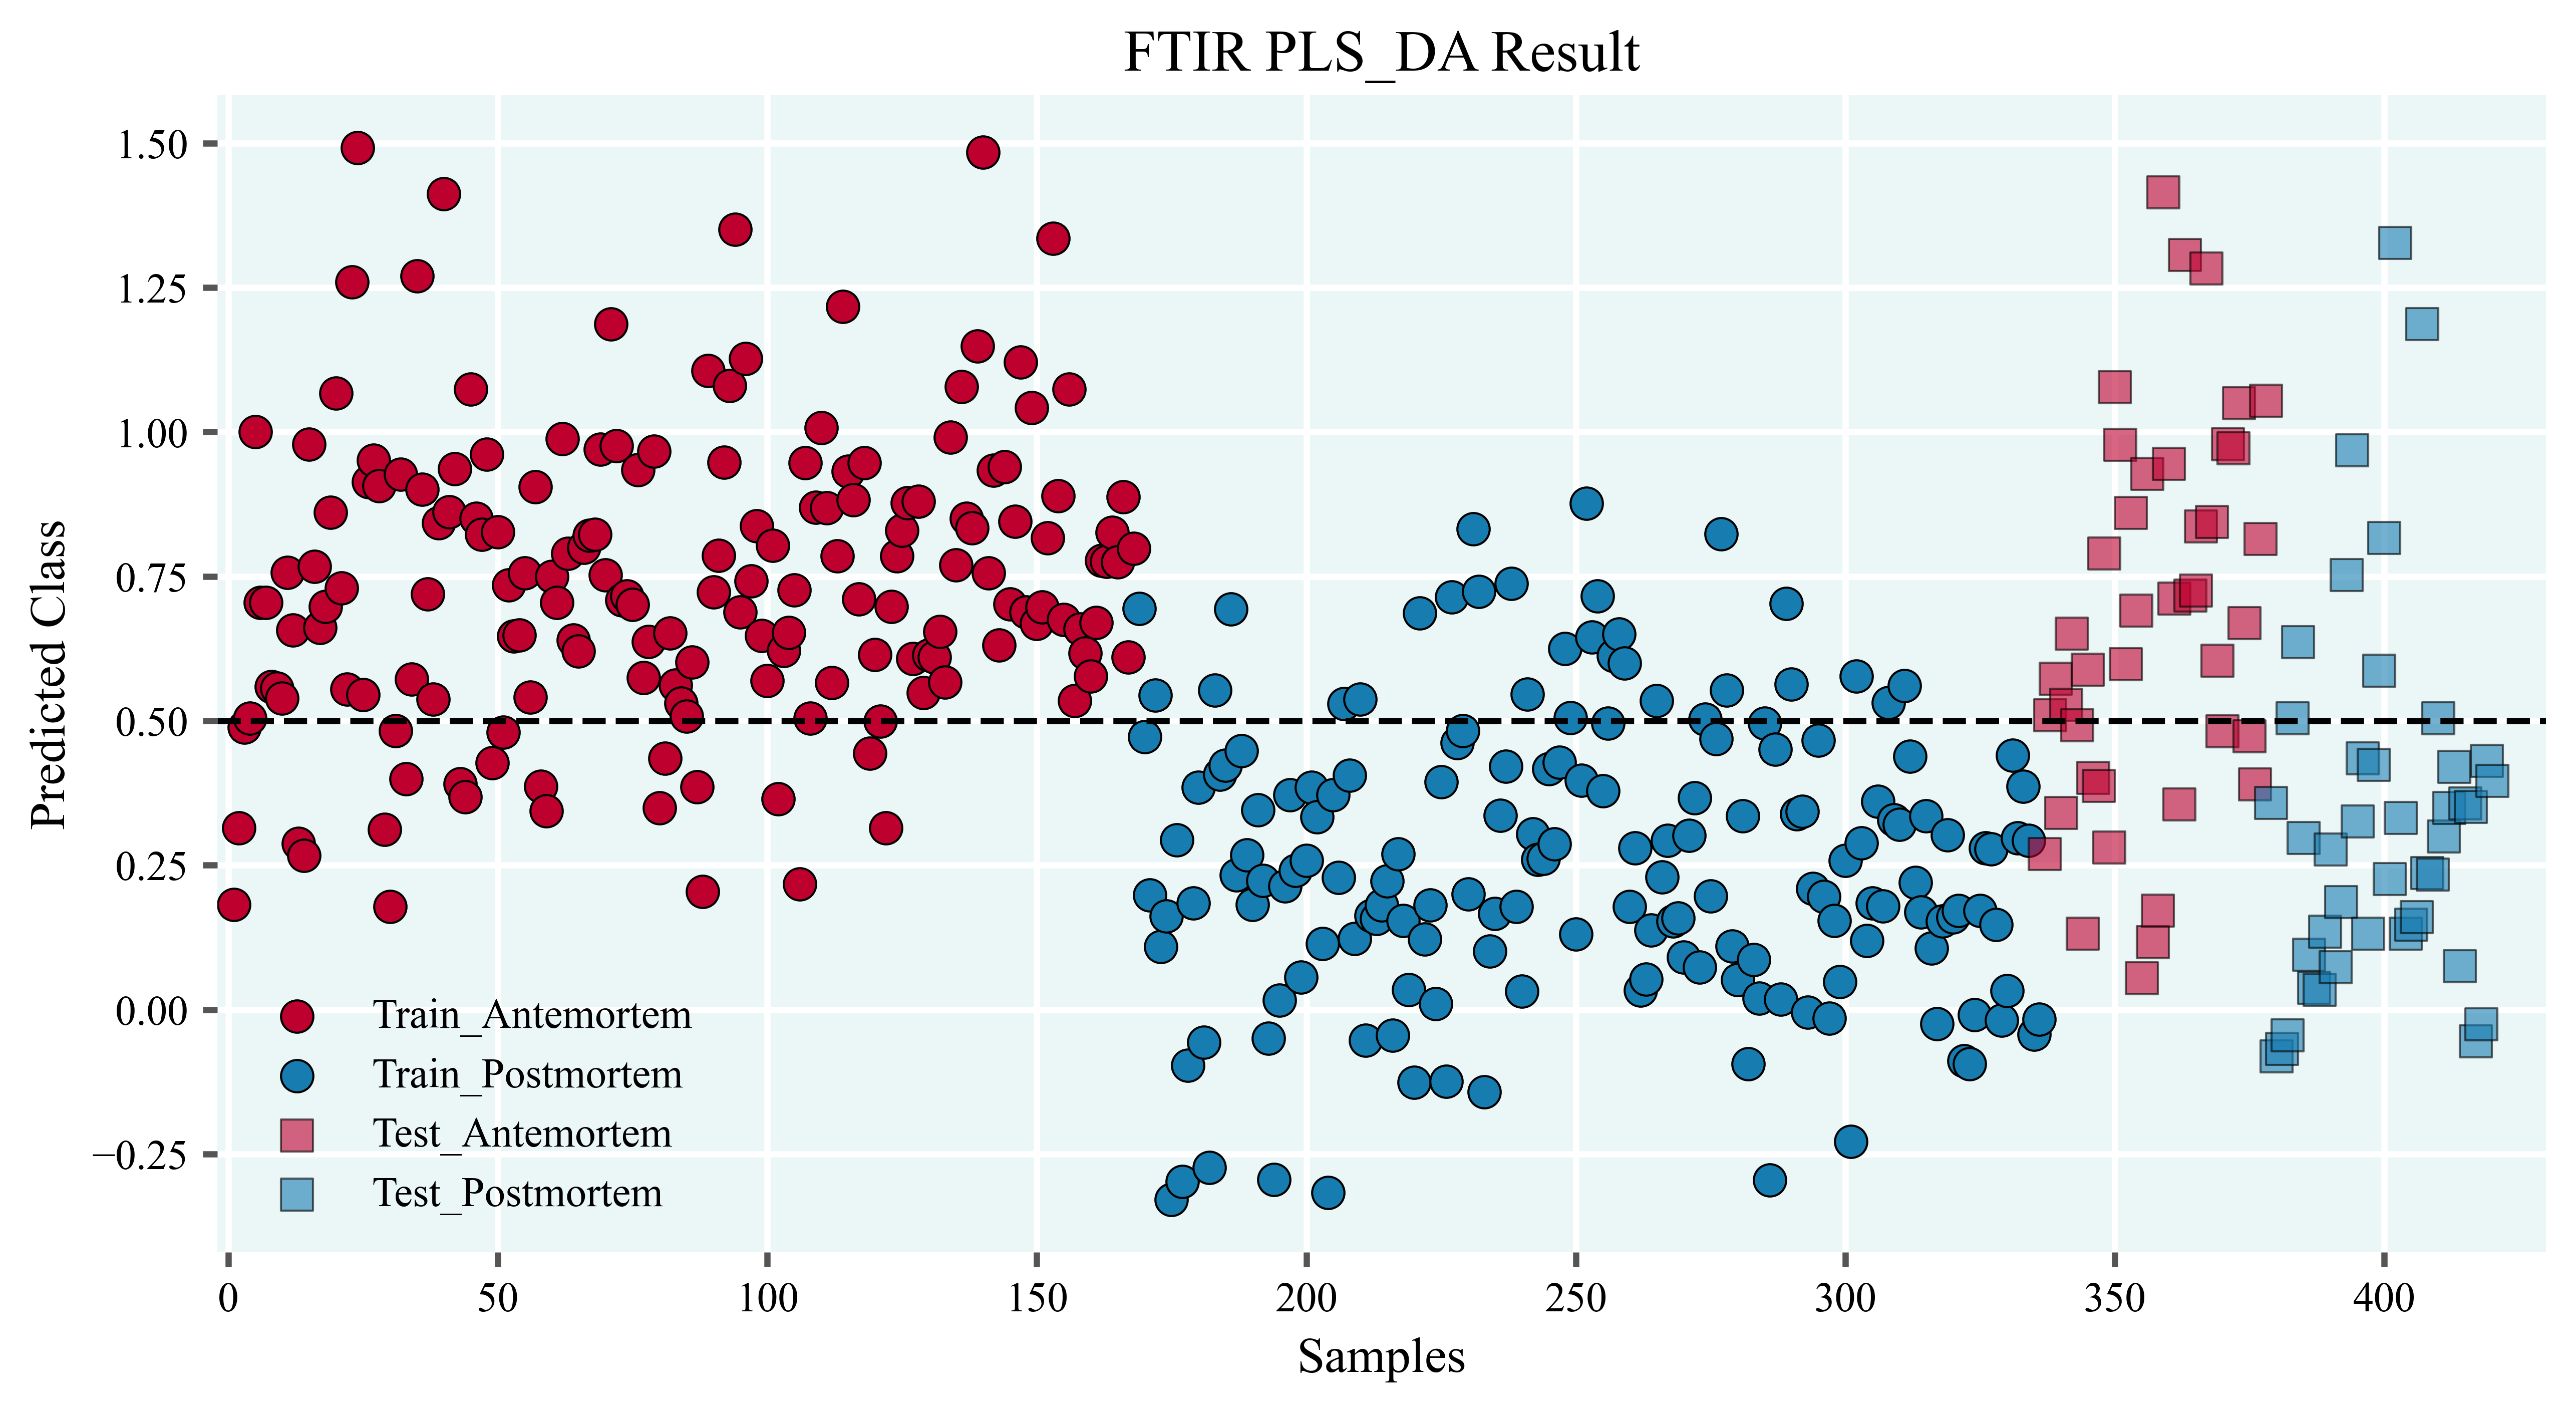

In [14]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
from pathlib import Path
from cycler import cycler
import matplotlib.font_manager as fm
# 全局修改rcParams["axes.prop_cycle"]，对所有子图生效
plt.style.use('ggplot')
default_cycler = (cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) )
plt.rc('axes', prop_cycle=default_cycler,labelcolor='#000000',facecolor='#ebf6f7',linewidth=0)
plt.rc('font',family='Times New Roman',weight='roman',size=10)
font_title=fm.FontProperties(family='Times New Roman',weight='roman',size=14)
font_label=fm.FontProperties(family='Times New Roman',weight='roman',size=12)
colors_2=['#be002f','#177cb0']
colors_3=['#be002f','#eaff56','#177cb0']
colors_6=['#99c1f9','#709cec','#5176db', '#3d4ec5', '#381faa','#03308d', '#18037a'] 
label_PC=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']
labels_2=['Antemortem','Postmortem']
labels_3=['Antemortem','Perimortem','Postmortem']
labels_6=['2h', '5d', '15d', '30d', '60d', '90d', '180d']

plt.figure(figsize=(10,5),dpi=600)
plt.subplots_adjust(hspace=0.2, wspace=0.1)


plt.scatter([*range(1,169,1)], prob_train[y_FTIR_train_two==1], c=colors_2[0],s=60, edgecolors='k',label='Train_Antemortem')
plt.scatter([*range(169,337,1)], prob_train[y_FTIR_train_two==0], c=colors_2[1],s=60, edgecolors='k',label='Train_Postmortem')
plt.scatter([*range(337,379,1)], prob_test[y_FTIR_test_two==1], marker='s', c=colors_2[0],s=60, alpha=0.6,edgecolors='k',label='Test_Antemortem')
plt.scatter([*range(379,421,1)], prob_test[y_FTIR_test_two==0], marker='s', c=colors_2[1],s=60, alpha=0.6,edgecolors='k',label='Test_Postmortem')
plt.axhline(y=0.5, c="black", ls="--", lw=1.5)
plt.xlabel('Samples',fontproperties=font_label)
plt.xlim(-2,430)
plt.ylabel('Predicted Class',fontproperties=font_label)
plt.tick_params(axis='both',labelsize=10,labelcolor='#000000',direction='out',width=1.5,grid_linewidth=1.5)
plt.legend(loc='best',frameon=False)
plt.title('FTIR PLS_DA Result',fontproperties=font_title)

In [15]:
from sklearn.metrics import  RocCurveDisplay,ConfusionMatrixDisplay

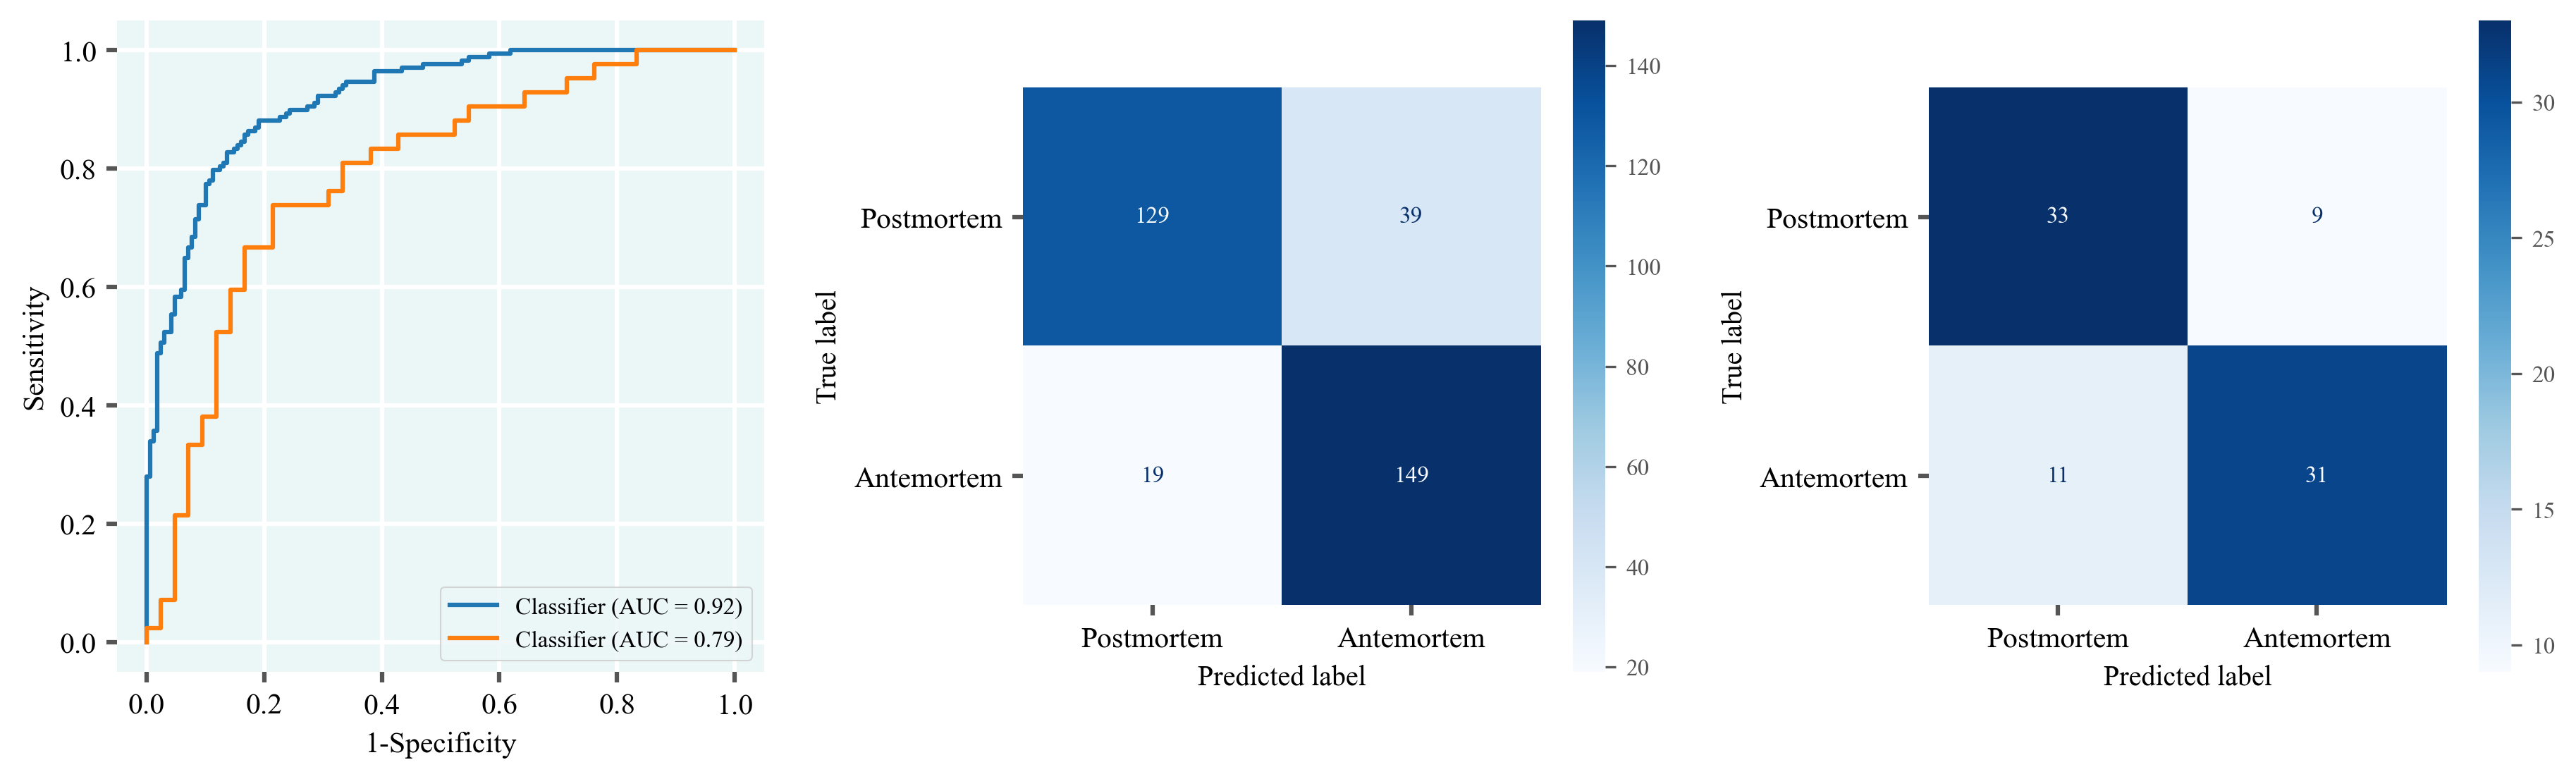

In [16]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
from pathlib import Path
from cycler import cycler
import matplotlib.font_manager as fm
# 全局修改rcParams["axes.prop_cycle"]，对所有子图生效
default_cycler = (cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) )
plt.style.use('ggplot')
plt.rc('axes', prop_cycle=default_cycler,labelcolor='#000000',facecolor='#ebf6f7',linewidth=0)
plt.rc('font',family='Times New Roman',weight='roman',size=8)
font_title=fm.FontProperties(family='Times New Roman',weight='roman',size=12)
font_label=fm.FontProperties(family='Times New Roman',weight='roman',size=10)


#plt.figure(figsize=(8,5),dpi=600)
#plt.subplots_adjust(hspace=0.2, wspace=0.1)

fig, [ax_1,ax_2,ax_3] = plt.subplots(1, 3, figsize=(15, 4),dpi=300)
plt.subplots_adjust(hspace=0.1, wspace=0.4)
ax_1.tick_params(axis='both',labelsize=10,labelcolor='#000000',direction='out',width=1.5,grid_linewidth=1.5)
RocCurveDisplay.from_predictions(y_FTIR_train_two,prob_train,ax=ax_1)
RocCurveDisplay.from_predictions(y_FTIR_test_two,prob_test,ax=ax_1)
ax_1.set_xlabel('1-Specificity',fontproperties=font_label)
ax_1.set_ylabel('Sensitivity',fontproperties=font_label)


ax_2.tick_params(axis='both',labelsize=10,labelcolor='#000000',direction='out',width=1.5,grid_linewidth=0)
ax_3.tick_params(axis='both',labelsize=10,labelcolor='#000000',direction='out',width=1.5,grid_linewidth=0)
ConfusionMatrixDisplay.from_predictions(y_FTIR_train_two,binary_train,ax=ax_2,display_labels=['Postmortem','Antemortem'],cmap='Blues')
ConfusionMatrixDisplay.from_predictions(y_FTIR_test_two,binary_test,ax=ax_3,display_labels=['Postmortem','Antemortem'],cmap='Blues')

## RMSECV

In [17]:
from sklearn.model_selection import GroupKFold,KFold,StratifiedKFold

In [18]:
train_rmse=[]
test_rmse=[]
components=np.arange(1,40,1)
cv=KFold(n_splits=10,shuffle=True,random_state=225)
for i in components:
    pls=PLSRegression(n_components=i)
    pls_cv=cross_validate(pls,x_FTIR_train, y_FTIR_train_two
                         ,cv=cv
                         ,scoring='neg_root_mean_squared_error'
                         ,return_train_score=True
                         ,verbose=0
                         ,n_jobs=48)
    test_rmse.append(np.mean(abs(pls_cv['test_score'])))
    train_rmse.append(np.mean(abs(pls_cv['train_score'])))  

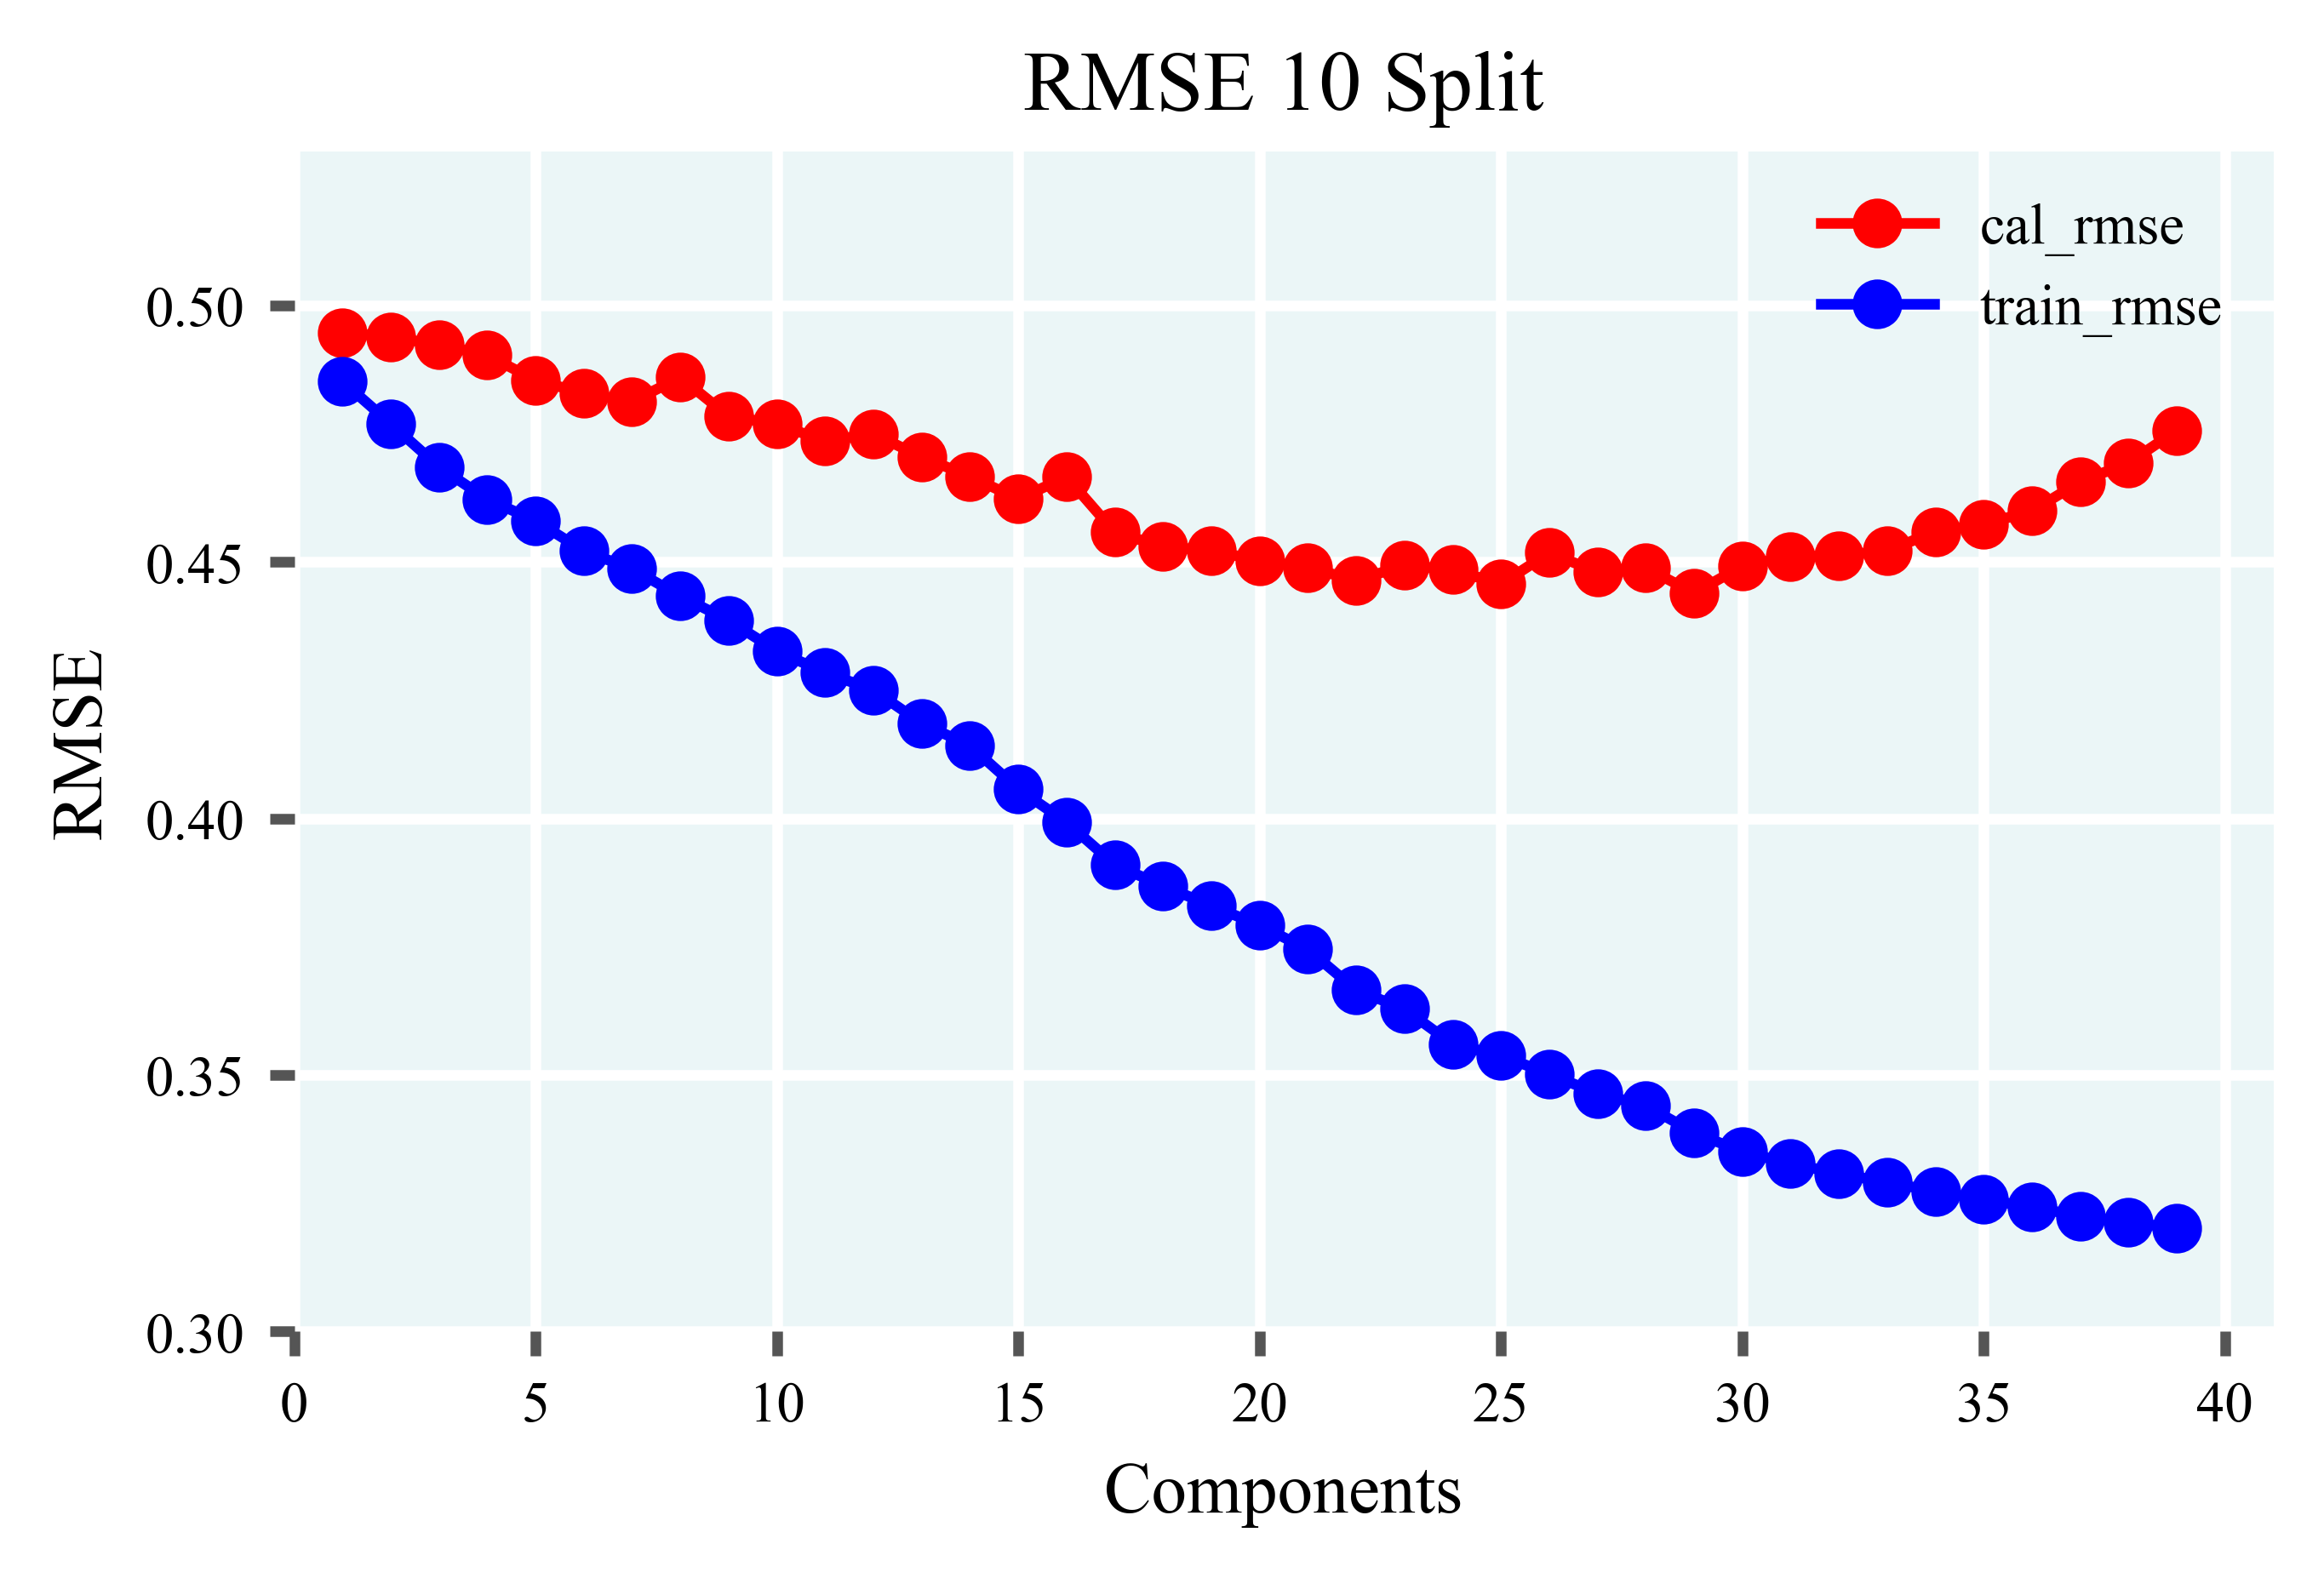

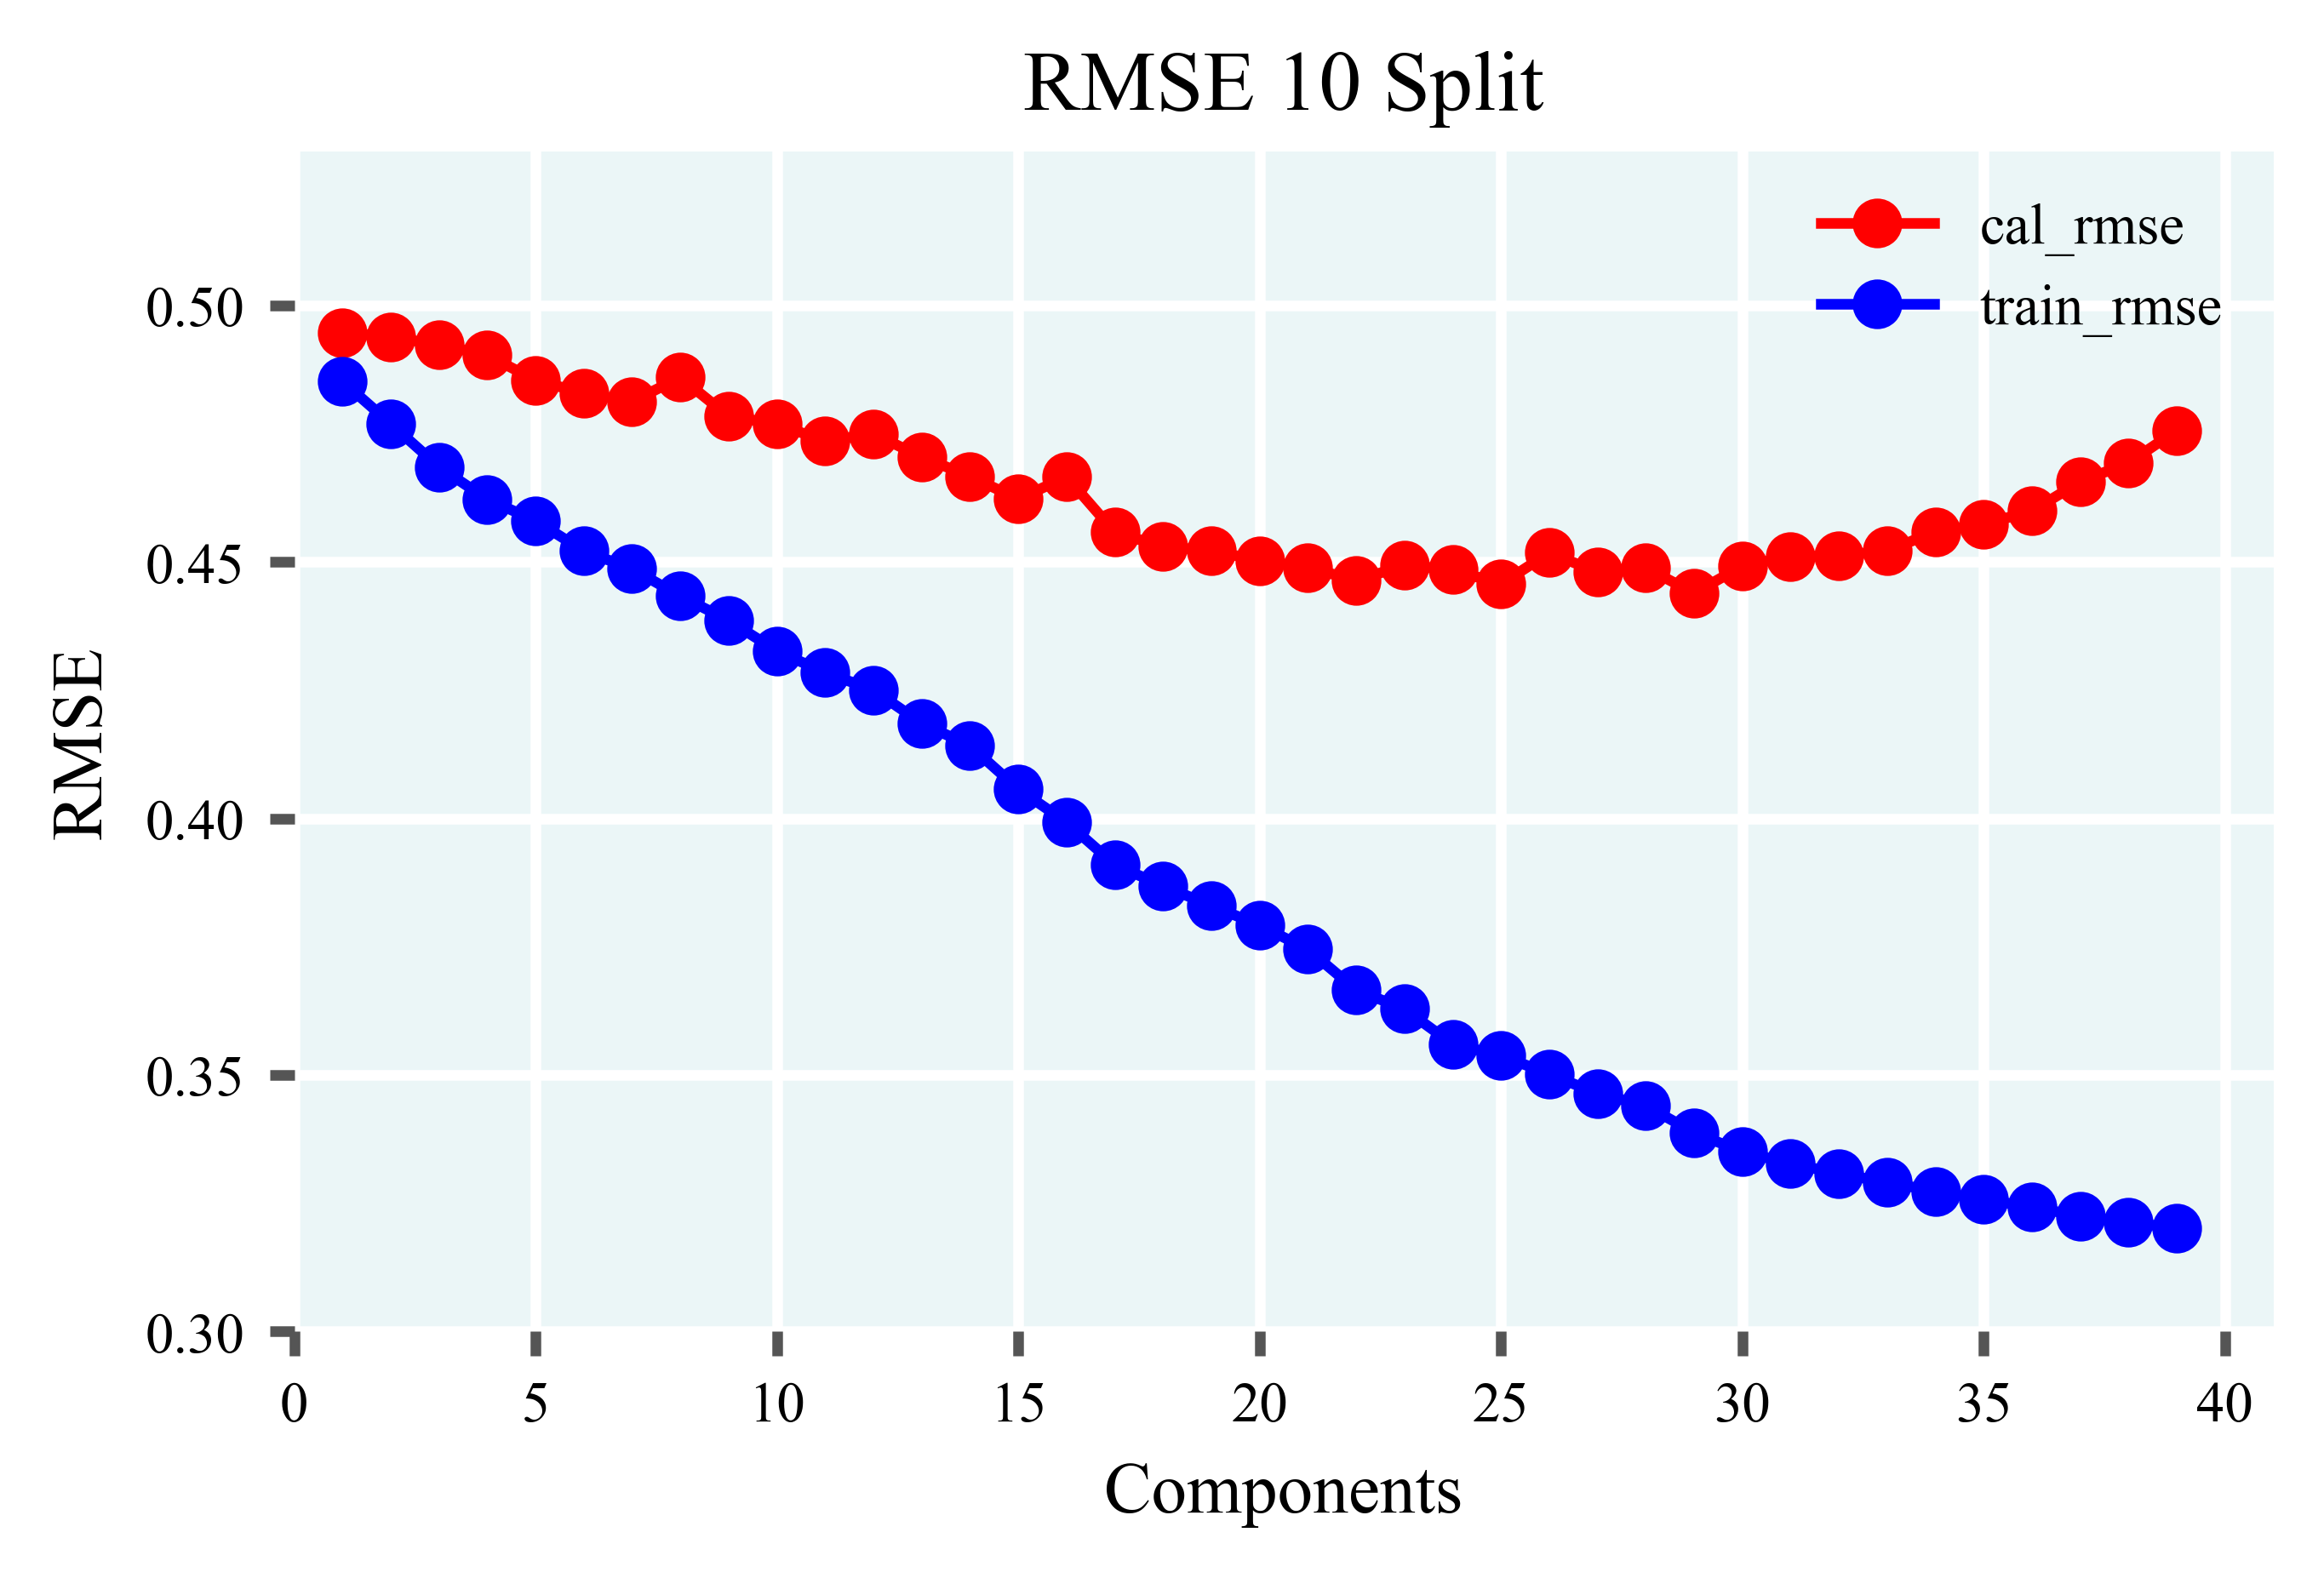

In [20]:
plt.rcParams.update(plt.rcParamsDefault)
from pathlib import Path
from cycler import cycler
import matplotlib.font_manager as fm
# 全局修改rcParams["axes.prop_cycle"]，对所有子图生效
default_cycler = (cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) )
plt.figure(figsize=(5,3),dpi=600)
plt.style.use('ggplot')
plt.rc('axes', prop_cycle=default_cycler,labelcolor='#000000',facecolor='#ebf6f7',linewidth=0)
plt.rc('font',family='Times New Roman',weight='roman',size=8)
font_title=fm.FontProperties(family='Times New Roman',weight='roman',size=12)
font_label=fm.FontProperties(family='Times New Roman',weight='roman',size=10)
plt.subplots_adjust(hspace=0.3, wspace=0.1)


plt.plot(components,test_rmse,'-o',label='cal_rmse',color='red')
plt.plot(components,train_rmse,'-o',label='train_rmse',color='blue')
plt.title('RMSE 10 Split',fontproperties=font_title)
plt.xlim(0,41)
plt.ylim(0.3,0.53)
#plt.ylim()   plt.axis([1,2,2,3],'tight','equal',)
plt.tick_params(axis='both',labelcolor='#000000',direction='out',width=1.5,grid_linewidth=1.5)
plt.xlabel('Components',fontproperties=font_label)
plt.ylabel('RMSE',fontproperties=font_label)
plt.legend(loc="best", frameon=False)
#plt.savefig('图片/FTIR_RMSE.eps',dpi=600,format='eps',bbox_inches='tight')
plt.show()

# Raman 建模

In [21]:
clf=PLS_DA(n_components=8,thred=0.472)
    
cv=KFold(n_splits=10,shuffle=True,random_state=360)
result_bench = cross_validate(clf,x_Raman_train,y_Raman_train_two,cv=cv,scoring="accuracy"
                          ,return_train_score=True
                          ,verbose=1
                          ,n_jobs=48
                        )

print('train_score:',np.mean(result_bench['train_score'])
      ,'\n''test_score:',np.mean(result_bench['test_score']))

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.5s


train_score: 0.8683845868030511 
test_score: 0.7920677361853833


[Parallel(n_jobs=48)]: Done  10 out of  10 | elapsed:    1.7s finished


In [22]:
result_df(clf.fit(x_Raman_train,y_Raman_train_two),x_Raman_train,y_Raman_train_two,x_Raman_test,y_Raman_test_two)

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


,accuracy_score,recall_score,precision_score,f1_score
train_eval,0.857143,0.857143,0.857143,0.857143
test_eval,0.785714,0.738095,0.815789,0.775000


# Combine PLS_da

In [23]:
clf=PLS_DA(n_components=9,thred=0.5)
    
cv=KFold(n_splits=10,shuffle=True,random_state=803)
result_bench = cross_validate(clf,x_Combine_train,y_Combine_train_two,cv=cv,scoring="accuracy"
                          ,return_train_score=True
                          ,verbose=1
                          ,n_jobs=48
                        )

print('train_score:',np.mean(result_bench['train_score'])
      ,'\n''test_score:',np.mean(result_bench['test_score']))

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   3 out of  10 | elapsed:    3.5s remaining:    8.2s


train_score: 0.9239383209844163 
test_score: 0.8124777183600713


[Parallel(n_jobs=48)]: Done  10 out of  10 | elapsed:    4.1s finished


In [24]:
result_df(clf.fit(x_Combine_train,y_Combine_train_two),x_Combine_train,y_Combine_train_two,x_Combine_test,y_Combine_test_two)

C:\Users\yukai\AppData\Roaming\Python\Python39\site-packages\sklearn\cross_decomposition\_pls.py:507: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


,accuracy_score,recall_score,precision_score,f1_score
train_eval,0.916667,0.898810,0.932099,0.915152
test_eval,0.785714,0.738095,0.815789,0.775000
